In [1]:
from __future__ import division
import os
import sys

import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
rna = pd.read_csv('rnaseq_results.txt', sep='\t')
rna['expression_lfc'] = rna['log2FoldChange']
rna['logBaseMean'] = np.log10(rna['baseMean'])

ribo = pd.read_csv('riboseq_results.txt', sep='\t')
ribo['occupancy_lfc'] = ribo['log2FoldChange']
ribo['logBaseMean'] = np.log10(ribo['baseMean'])

te = pd.read_csv('te_results.txt', sep='\t')
te['efficiency_lfc'] = te['log2FoldChange']
te['logBaseMean'] = np.log10(te['baseMean'])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


In [3]:
## Diff. expression (RNA seq.) 10% FDR
rna10fdr = rna[rna['padj']<0.1].sort_values(by='log2FoldChange')
rna10fdr.to_csv('rna10fdr_table.txt', sep='\t')
rna10fdr.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,expression_lfc,logBaseMean
YNL143C,1222.475129,-7.420364,0.494599,-15.002790,7.039640e-51,4.783436e-48,-7.420364,3.087240
YOR133W,573.945367,-4.938706,0.551468,-8.955560,3.380158e-19,1.934162e-17,-4.938706,2.758871
YHR136C,217.345465,-4.878184,0.376758,-12.947806,2.417639e-38,8.213928e-36,-4.878184,2.337151
YLR154W-A,44.787791,-4.842576,0.575066,-8.420901,3.736011e-17,1.611822e-15,-4.842576,1.651160
YGL208W,87.192686,-4.672022,0.477404,-9.786313,1.289111e-22,1.001087e-20,-4.672022,1.940480


In [4]:
## Diff. occupancy (Ribo. seq.) 10% FDR
ribo10fdr = ribo[ribo['padj']<0.1].sort_values(by='log2FoldChange')
ribo10fdr.to_csv('ribo10fdr_table.txt', sep='\t')
ribo10fdr.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,occupancy_lfc,logBaseMean
YOR133W,409.898822,-5.119191,0.549237,-9.320551,1.157378e-20,6.175256e-18,-5.119191,2.612677
YCL064C,175.613099,-5.042327,0.371126,-13.586562,4.811556e-42,5.776273e-39,-5.042327,2.244557
YML123C,1468.280699,-4.558623,0.268517,-16.977048,1.214429e-64,2.915845e-61,-4.558623,3.166809
YGR234W,591.047099,-4.531955,0.308755,-14.678156,8.897805e-49,1.424242e-45,-4.531955,2.771622
YGR008C,40.760979,-4.209163,0.491154,-8.569937,1.035420e-17,3.551490e-15,-4.209163,1.610245


In [5]:
## Diff. TE (combined) 10% FDR
te10fdr = te[te['padj']<0.1].sort_values(by='log2FoldChange')
te10fdr.to_csv('te10fdr_table.txt', sep='\t')
te10fdr.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,efficiency_lfc,logBaseMean
YNL014W,39.025864,-8.144491,1.521234,27.157041,1.875808e-07,0.000034,-8.144491,1.591353
YGL125W,27.149397,-6.840060,1.528693,25.169894,5.249532e-07,0.000077,-6.840060,1.433760
YBR092C,203.141477,-5.776442,0.594067,29.646289,5.185181e-08,0.000011,-5.776442,2.307799
YJL079C,131.399486,-5.680073,0.686573,10.090584,1.490289e-03,0.037856,-5.680073,2.118594
YEL050W-A,4.204441,-5.638515,2.089747,12.183148,4.822320e-04,0.017476,-5.638515,0.623708


In [12]:
def plot_ma(data, ax=None, low_lfc=-3, high_lfc=3, p_thres=0.1, title=None):
    if not ax:
        ax = plt.gca()
    
    ## Get points that fall in range
    base = data[data['log2FoldChange'].between(low_lfc,high_lfc)]
    baseNotSig = base[base['padj']>=p_thres]
    baseSig = base[base['padj']<p_thres]
    
    ## Get points out of range
    low = data[data['log2FoldChange']<low_lfc]
    lowNotSig = low[low['padj']>=p_thres]
    lowSig = low[low['padj']<p_thres]
    
    high = data[data['log2FoldChange']>high_lfc]
    highNotSig = high[high['padj']>=p_thres]
    highSig = high[high['padj']<p_thres]
    
    ## Plot
    ax.scatter(baseNotSig['logBaseMean'], baseNotSig['log2FoldChange'], edgecolor='none', c='k', s=5)
    ax.scatter(baseSig['logBaseMean'], baseSig['log2FoldChange'], edgecolor='none', c='r', s=5)
    
    ax.scatter(lowNotSig['logBaseMean'], np.maximum(low_lfc, lowNotSig['log2FoldChange']), edgecolor='k', marker='v', c='none', s=20)
    ax.scatter(lowSig['logBaseMean'], np.maximum(low_lfc, lowSig['log2FoldChange']), edgecolor='r', marker='v', c='none', s=20)
    
    ax.scatter(highNotSig['logBaseMean'], np.minimum(high_lfc, highNotSig['log2FoldChange']), edgecolor='k', marker='^', c='none', s=20)
    ax.scatter(highSig['logBaseMean'], np.minimum(high_lfc, highSig['log2FoldChange']), edgecolor='r', marker='^', c='none', s=20)
    
    ax.axhline(0, linewidth=3, c='r', alpha=0.5, zorder=6)
    
    ax.set_xlim(-1,5)
    ax.set_ylim(low_lfc-0.2,high_lfc+0.2)
    
    xticks = ax.get_xticks()
    ax.set_xticklabels(['10$^{%d}$' % int(x) for x in xticks])
    
    ax.set_xlabel('Mean of normalized counts')
    ax.set_ylabel('Log$_{2}$ fold change\n($\it{S.paradoxus}$ : $\it{S.cerevisiae}$)')
    if title:
        ax.set_title(title)

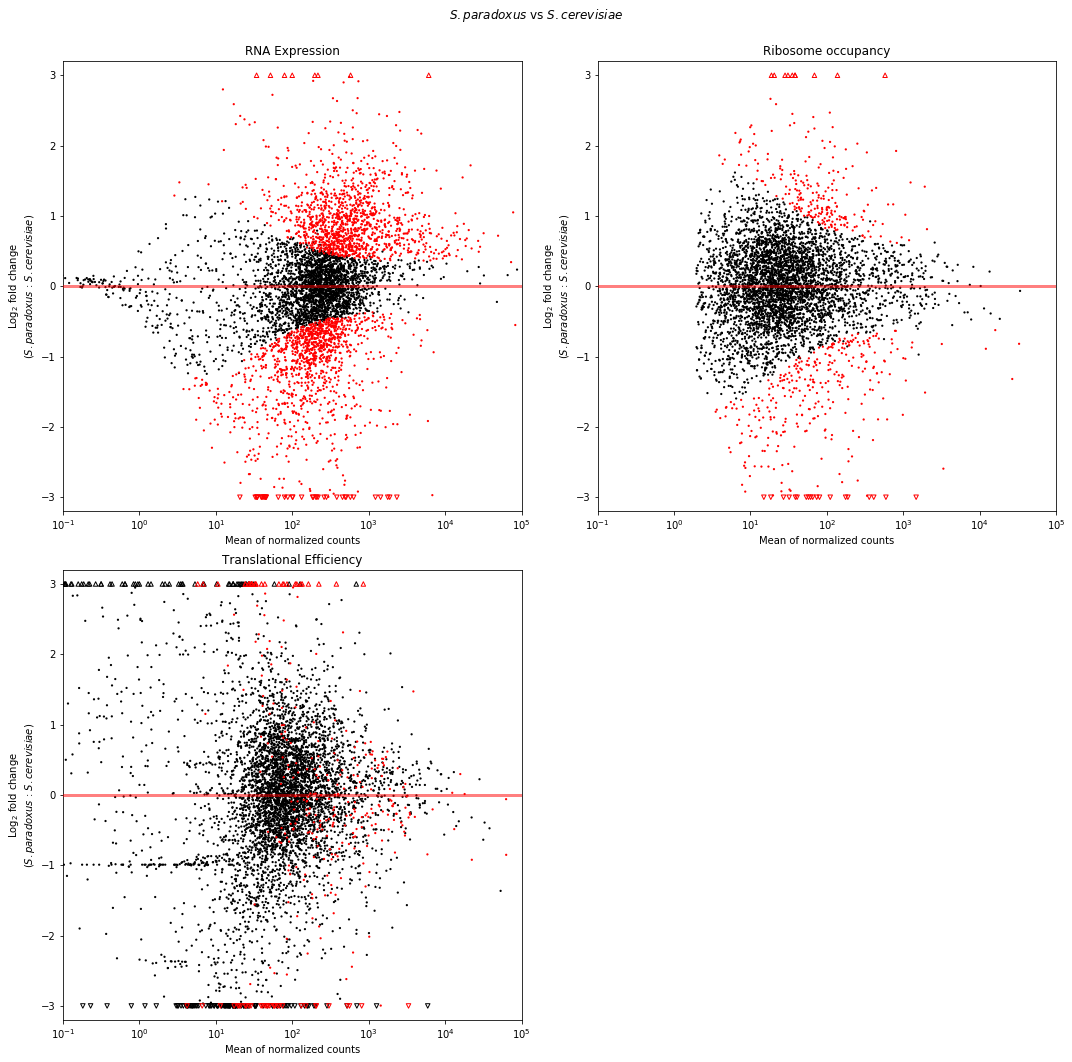

In [27]:
data = [rna,ribo,te]
titles = ['RNA Expression', 'Ribosome occupancy', 'Translational Efficiency']

fig,axesArray = plt.subplots(2,2, figsize=(15,15), facecolor='#FFFFFF')
axes = np.ndarray.flatten(axesArray)

for i,(df,title) in enumerate(zip(data,titles)):
    plot_ma(df, ax=axes[i], title=title)

for ax in axes[len(data):]:
    ax.axis('off')
    
fig.suptitle(r'$\it{S.paradoxus}$ vs $\it{S.cerevisiae}$')
plt.tight_layout()
plt.subplots_adjust(top=0.93)

In [30]:
## Summarize types of evolution
comb = rna[['expression_lfc']].join(te[['efficiency_lfc']])
comb.head()

,expression_lfc,efficiency_lfc
YAL001C,0.133499,-0.533629
YAL002W,-0.337477,0.009133
YAL003W,0.517269,0.141747
YAL005C,-0.731109,-1.566673
YAL007C,0.039403,-0.332682


In [31]:
def get_direction(row):
    if row['expression_lfc'] > 0:
        exp = 'Increase'
    elif row['expression_lfc'] < 0:
        exp = 'Decrease'
    else:
        exp = 'No change'
    
    if row['efficiency_lfc'] > 0:
        eff = 'Increase'
    elif row['efficiency_lfc'] < 0:
        eff = 'Decrease'
    else:
        eff = 'No change'
    
    return (exp,eff)

In [32]:
comb['d_expression'],comb['d_efficiency'] = zip(*comb.apply(get_direction, axis=1))

In [34]:
comb.pivot_table(index=['d_expression','d_efficiency'], aggfunc=np.count_nonzero)

efficiency_lfc  expression_lfc
d_expression d_efficiency                                
Decrease     Decrease              1864.0          1864.0
             Increase               871.0           871.0
Increase     Decrease               838.0           838.0
             Increase              1863.0          1863.0
No change    No change               38.0            38.0

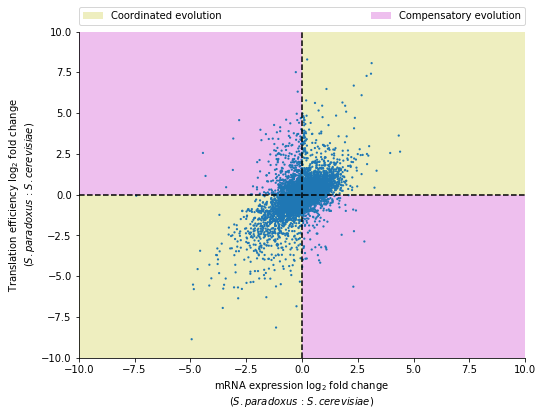

In [65]:
fig,ax = plt.subplots(1,1, figsize=(8,6), facecolor='#FFFFFF')

ax.set_xlim(-10,10)
ax.set_ylim(-10, 10)

# ax.spines['left'].set_position('center')
# ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('mRNA expression log$_{2}$ fold change\n($\it{S.paradoxus}$ : $\it{S.cerevisiae}$)')
ax.set_ylabel('Translation efficiency log$_{2}$ fold change\n($\it{S.paradoxus}$ : $\it{S.cerevisiae}$)')

# ax.text(-5,-9, 'Coordinated evolution', ha='center')
# ax.text(5,9, 'Coordinated evolution', ha='center')
# ax.text(-5,9, 'Compensatory evolution', ha='center')
# ax.text(5,-9, 'Compensatory evolution', ha='center')

patches = [
    mpl.patches.Rectangle((-10,-10), 10, 10, facecolor='y', alpha=0.25, zorder=1, label='Coordinated evolution'),
    mpl.patches.Rectangle((0,0), 10, 10, facecolor='y', alpha=0.25, zorder=1),
    mpl.patches.Rectangle((-10,0), 10, 10, facecolor='m', alpha=0.25, zorder=1, label='Compensatory evolution'),
    mpl.patches.Rectangle((0,-10), 10, 10, facecolor='m', alpha=0.25, zorder=1),
]

for p in patches:
    ax.add_patch(p)

ax.scatter(comb['expression_lfc'], comb['efficiency_lfc'], edgecolor='none', s=5, zorder=2, label='_')
ax.axhline(0, c='k', linestyle='--', zorder=3)
ax.axvline(0, c='k', linestyle='--', zorder=3)

ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0)